#### Derivatives Problem Set 2
Nikhar Gupta, 
Anirudh Chinubhai,
Kunal Bagali.

In [513]:
import pandas as pd
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt 

In [514]:
s0= 296.43
r_libor= 0.005
FV_mult=(1+17/360*(r_libor)) 


In [515]:
data=pd.read_excel("PS2_Q1_data.xlsx")
data

,Calls,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Puts,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Ticker,Strike,Bid,Ask,Last,Mid,IVM,Volm,Ticker,Strike,Bid,Ask,Last,Mid,IVM,Volm,NaN,NaN
1,18-Sep-20 (17d); CSize 100; R .25; IFwd 296.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FB 9/18/20 C275,275,25.550003,25.800003,25.35,25.675003,48.465481,86,FB 9/18/20 P275,275,4.1,4.25,4.25,4.175,48.727832,139,NaN,NaN
3,FB 9/18/20 C277.5,277.5,23.600006,23.949997,23.4,23.775002,47.809231,3,FB 9/18/20 P277.5,277.5,4.7,4.85,4.49,4.775,47.833953,25,NaN,NaN
4,FB 9/18/20 C280,280,21.850006,22.100006,21.799999,21.975006,47.683109,221,FB 9/18/20 P280,280,5.35,5.55,5.45,5.45,47.842985,189,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FB 12/18/20 C360,360,10.95,11.3,11.27,11.125,47.548795,9,FB 12/18/20 P360,360,74.050003,74.600006,73.550003,74.325005,47.491753,0,NaN,NaN
81,FB 12/18/20 C370,370,9.3,9.55,9.64,9.425,47.59706,55,FB 12/18/20 P370,370,82.25,82.949997,110.25,82.599998,47.697399,0,NaN,NaN
82,FB 12/18/20 C380,380,7.8,8.1,8.5,7.95,47.86071,12,FB 12/18/20 P380,380,90.800003,91.449997,0,91.125,47.625189,0,NaN,NaN
83,FB 12/18/20 C390,390,6.6,6.9,6.75,6.75,48.050091,204,FB 12/18/20 P390,390,99.5,100.300003,0,99.900002,47.926086,0,NaN,NaN


In [516]:
array=["FB 9/18/20 C285","FB 9/18/20 C290","FB 9/18/20 C295", "FB 9/18/20 C300"]
data=data.loc[data["Calls"].isin(array)]

In [517]:
data

,Calls,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Puts,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
6,FB 9/18/20 C285,285,18.449997,18.699997,18.450001,18.574997,47.604343,142,FB 9/18/20 P285,285,7,7.2,7.2,7.1,47.760456,133,NaN,NaN
8,FB 9/18/20 C290,290,15.4,15.65,15.56,15.525,47.12748,1297,FB 9/18/20 P290,290,8.95,9.15,9.1,9.05,47.494015,520,NaN,NaN
10,FB 9/18/20 C295,295,12.75,12.95,12.75,12.85,47.097618,1970,FB 9/18/20 P295,295,11.2,11.45,11.4,11.325,47.37981,339,NaN,NaN
12,FB 9/18/20 C300,300,10.4,10.55,10.55,10.475,46.943924,5675,FB 9/18/20 P300,300,13.85,14.1,14.02,13.975,47.234516,138,NaN,NaN


In [518]:
data_call = data[["Calls","Unnamed: 1", "Unnamed: 2", "Unnamed: 3"]]
data_call.rename(columns={"Unnamed: 1" : "Strike", "Unnamed: 2": "Bid", "Unnamed: 3": "Ask"}, inplace= True)
data_call

/Users/kunalbagali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Calls,Strike,Bid,Ask
6,FB 9/18/20 C285,285,18.449997,18.699997
8,FB 9/18/20 C290,290,15.4,15.65
10,FB 9/18/20 C295,295,12.75,12.95
12,FB 9/18/20 C300,300,10.4,10.55


In [519]:
data_puts = data[["Puts","Unnamed: 9", "Unnamed: 10", "Unnamed: 11"]]
data_puts.rename(columns={"Unnamed: 9" : "Strike", "Unnamed: 10": "Bid", "Unnamed: 11": "Ask"}, inplace= True)
data_puts

/Users/kunalbagali/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Puts,Strike,Bid,Ask
6,FB 9/18/20 P285,285,7,7.2
8,FB 9/18/20 P290,290,8.95,9.15
10,FB 9/18/20 P295,295,11.2,11.45
12,FB 9/18/20 P300,300,13.85,14.1


In [520]:
data_puts['premium']= (data_puts['Bid']+data_puts['Ask'])/2
data_call['Preminum']=(data_call['Bid']+data_call['Ask'])/2

<ipython-input-520-fd62b4a22433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_puts['premium']= (data_puts['Bid']+data_puts['Ask'])/2
<ipython-input-520-fd62b4a22433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_call['Preminum']=(data_call['Bid']+data_call['Ask'])/2


In [521]:
data_puts

,Puts,Strike,Bid,Ask,premium
6,FB 9/18/20 P285,285,7,7.2,7.1
8,FB 9/18/20 P290,290,8.95,9.15,9.05
10,FB 9/18/20 P295,295,11.2,11.45,11.325
12,FB 9/18/20 P300,300,13.85,14.1,13.975


Dewfine the profit and payoff functions for call and put options and the stocks

In [522]:
def payoff_longcall(strike,spot, premium):
    pay = np.zeros(len(spot))
    for i in range(len(spot)):
        pay[i]= np.max([0,spot[i]-strike])
    profit = pay - (FV_mult*premium)
    return {f"payoff Long Call {strike}": pay, f"profit Long Call {strike}": profit}
    
def payoff_longput(strike,spot, premium):
    pay = np.zeros(len(spot))
    for i in range(len(spot)):
        pay[i]= np.max([0,strike-spot[i]])
    profit = pay - (FV_mult*premium)
    return {f"payoff Long Put {strike}": pay, f"profit Long Put {strike}": profit}

def payoff_shortcall(strike,spot, premium):
    pay = np.zeros(len(spot))
    for i in range(len(spot)):
        pay[i]= -np.max([0,spot[i]-strike])
    profit = pay + (FV_mult*premium)
    return {f"payoff Short Call {strike}": pay, f"profit Short Call {strike}": profit}

def payoff_shortput(strike,spot, premium):
    pay = np.zeros(len(spot))
    for i in range(len(spot)):
        pay[i]= -np.max([0,strike- spot[i]])
    profit = pay + (FV_mult*premium)
    return {f"payoff Short Put {strike}": pay, f"profit Short Put {strike}": profit}

def short_stock(spot, current_price):
    pay=-spot
    profit = current_price-spot
    return {"payoff short stock": pay, "profit short stock": profit}

def long_stock(spot, current_price):
    pay=spot
    profit = spot-current_price
    return {"payoff long stock": pay, "profit long stock": profit}
    


#### Question 1 A

In [523]:
spots = np.arange(220,350,1)
data_call[data_call["Strike"]==300]["Preminum"]
data_puts[data_puts["Strike"]==285]["premium"]



6    7.1
Name: premium, dtype: object

In [524]:
short_put285= payoff_shortput(285, spots, 7.1)
long_call300 = payoff_longcall(300, spots,10.475)
short_stock_s0=short_stock(spots,s0)
dict={}
dict.update(short_stock_s0) 
dict.update(long_call300) 
dict.update(short_put285) 


In [525]:
portfolio_1a=pd.DataFrame(data=dict, index= spots)
portfolio_1a


,payoff short stock,profit short stock,payoff Long Call 300,profit Long Call 300,payoff Short Put 285,profit Short Put 285
220,-220,76.43,0.0,-10.477473,-65.0,-57.898324
221,-221,75.43,0.0,-10.477473,-64.0,-56.898324
222,-222,74.43,0.0,-10.477473,-63.0,-55.898324
223,-223,73.43,0.0,-10.477473,-62.0,-54.898324
224,-224,72.43,0.0,-10.477473,-61.0,-53.898324
...,...,...,...,...,...,...
345,-345,-48.57,45.0,34.522527,0.0,7.101676
346,-346,-49.57,46.0,35.522527,0.0,7.101676
347,-347,-50.57,47.0,36.522527,0.0,7.101676
348,-348,-51.57,48.0,37.522527,0.0,7.101676


In [526]:
portfolio_1a['Profit']= portfolio_1a["profit Long Call 300"] + portfolio_1a['profit short stock']+ portfolio_1a['profit Short Put 285']
portfolio_1a['Payoff'] = portfolio_1a["payoff Long Call 300"] + portfolio_1a['payoff short stock']+ portfolio_1a['payoff Short Put 285']
portfolio_1a

,payoff short stock,profit short stock,payoff Long Call 300,profit Long Call 300,payoff Short Put 285,profit Short Put 285,Profit,Payoff
220,-220,76.43,0.0,-10.477473,-65.0,-57.898324,8.054203,-285.0
221,-221,75.43,0.0,-10.477473,-64.0,-56.898324,8.054203,-285.0
222,-222,74.43,0.0,-10.477473,-63.0,-55.898324,8.054203,-285.0
223,-223,73.43,0.0,-10.477473,-62.0,-54.898324,8.054203,-285.0
224,-224,72.43,0.0,-10.477473,-61.0,-53.898324,8.054203,-285.0
...,...,...,...,...,...,...,...,...
345,-345,-48.57,45.0,34.522527,0.0,7.101676,-6.945797,-300.0
346,-346,-49.57,46.0,35.522527,0.0,7.101676,-6.945797,-300.0
347,-347,-50.57,47.0,36.522527,0.0,7.101676,-6.945797,-300.0
348,-348,-51.57,48.0,37.522527,0.0,7.101676,-6.945797,-300.0


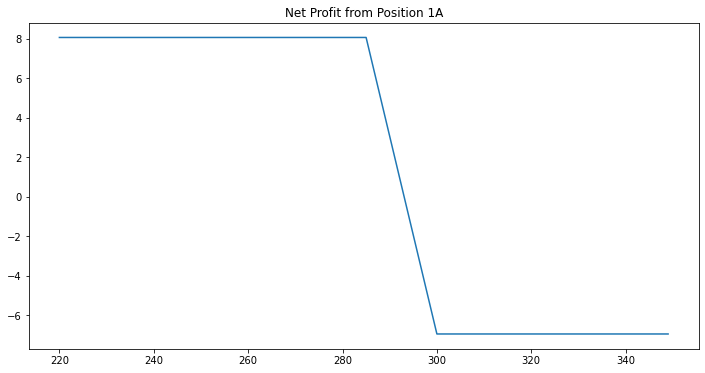

In [527]:
plt.figure(figsize=(12,6))
plt.plot(portfolio_1a['Profit'])
plt.title("Net Profit from Position 1A")
plt.show()


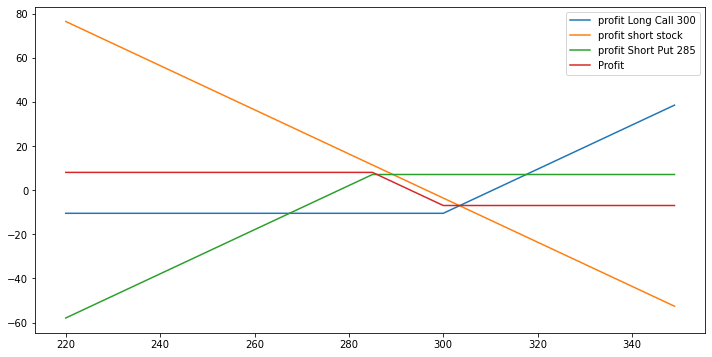

In [528]:
plt.figure(figsize=(12,6))
plt.plot(portfolio_1a["profit Long Call 300"])
plt.plot(portfolio_1a['profit short stock'])
plt.plot(portfolio_1a['profit Short Put 285'])
plt.plot(portfolio_1a['Profit'])
plt.legend(["profit Long Call 300",'profit short stock','profit Short Put 285','Profit'])

The above profit diagram represents a bear spread and can be created with an equivalent trategy of going long on a put at strike price (300-FV(Premium)) and writing a put at a strike price of xx

#### Question 1 A Equivalent

In [529]:
short_call285= payoff_shortcall(285, spots,18.574997 )
eq_1a ={}
eq_1a.update(short_call285)
eq_1a.update(long_call300)

In [530]:
port_1a_eq = pd.DataFrame(data=eq_1a,index=spots)
port_1a_eq['Profits']= port_1a_eq['profit Short Call 285']+port_1a_eq['profit Long Call 300']


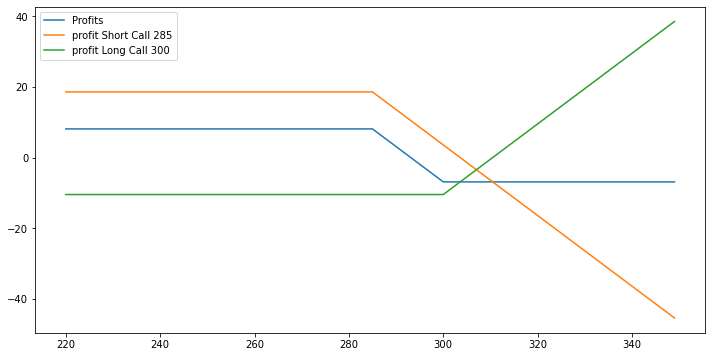

In [531]:
plt.figure(figsize=(12,6))
plt.plot(port_1a_eq['Profits'])
plt.plot(port_1a_eq['profit Short Call 285'])
plt.plot(port_1a_eq['profit Long Call 300'])
plt.legend(['Profits','profit Short Call 285','profit Long Call 300'])
plt.show()

#### Question 1 B

In [532]:
short_call290 = payoff_shortcall(290, spots, 15.525)
short_put295= payoff_shortput(295, spots, 12.85)
dict_position_b ={}
dict_position_b.update(short_call290)
dict_position_b.update(short_put295)
port_1b= pd.DataFrame(data=dict_position_b,index=spots )

In [533]:
port_1b['Profit'] = port_1b["profit Short Call 290"]+ port_1b["profit Short Put 295"]
port_1b

,payoff Short Call 290,profit Short Call 290,payoff Short Put 295,profit Short Put 295,Profit
220,0.0,15.528666,-75.0,-62.146966,-46.6183
221,0.0,15.528666,-74.0,-61.146966,-45.6183
222,0.0,15.528666,-73.0,-60.146966,-44.6183
223,0.0,15.528666,-72.0,-59.146966,-43.6183
224,0.0,15.528666,-71.0,-58.146966,-42.6183
...,...,...,...,...,...
345,-55.0,-39.471334,0.0,12.853034,-26.6183
346,-56.0,-40.471334,0.0,12.853034,-27.6183
347,-57.0,-41.471334,0.0,12.853034,-28.6183
348,-58.0,-42.471334,0.0,12.853034,-29.6183


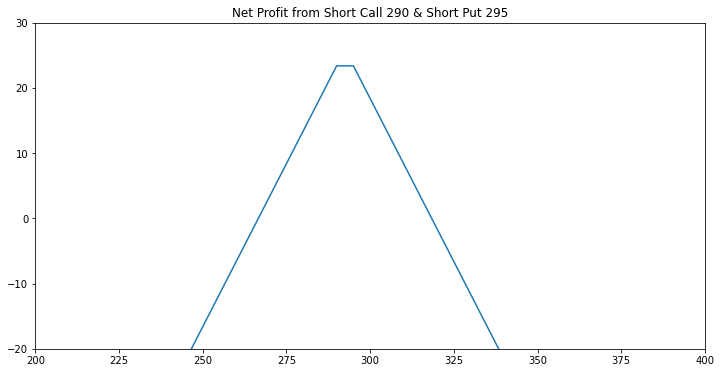

In [534]:
plt.figure(figsize=(12,6))
plt.plot(port_1b['Profit'])
plt.xlim(200,400)
plt.ylim(-20,30)
plt.title("Net Profit from Short Call 290 & Short Put 295")
plt.show()

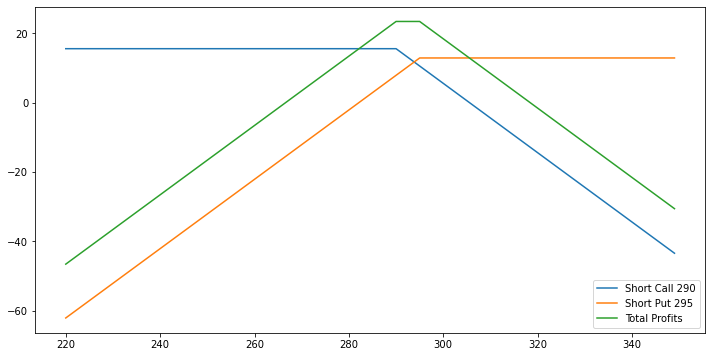

In [535]:
plt.figure(figsize=(12,6))
plt.plot(port_1b["profit Short Call 290"])
plt.plot(port_1b['profit Short Put 295'])
plt.plot(port_1b['Profit'])
plt.legend(["Short Call 290", "Short Put 295", "Total Profits"])
plt.show()

#### Equivalent position 1 B

In [536]:
short_p290 = payoff_shortput(290, spots,9.05 )
short_call295 = payoff_shortcall(295, spots,12.85)
dict_1b_eq={}
dict_1b_eq.update(short_p290)
dict_1b_eq.update(short_call295)

In [537]:
port_eq_1b= pd.DataFrame(data=dict_1b_eq, index=spots)
port_eq_1b["Profits"] = port_eq_1b["profit Short Put 290"] + port_eq_1b["profit Short Call 295"]
port_eq_1b["Profits"]


220   -48.094829
221   -47.094829
222   -46.094829
223   -45.094829
224   -44.094829
         ...    
345   -28.094829
346   -29.094829
347   -30.094829
348   -31.094829
349   -32.094829
Name: Profits, Length: 130, dtype: float64

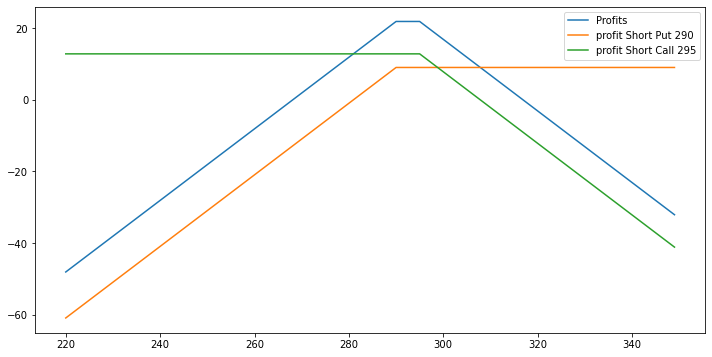

In [538]:
plt.figure(figsize=(12,6))
plt.plot(port_eq_1b['Profits'])
plt.plot(port_eq_1b["profit Short Put 290"])
plt.plot(port_eq_1b["profit Short Call 295"])
plt.legend(['Profits',"profit Short Put 290","profit Short Call 295"])
plt.show()

#### Question 1 C

In [539]:
long_stock1c= long_stock(spots,s0)
short_call285=payoff_shortcall(285, spots,18.574997)
long_call295= payoff_longcall(295, spots, 12.85)
dict_1c={}
dict_1c.update(long_stock1c)
dict_1c.update(short_call285)
dict_1c.update(long_call295)

In [540]:
port_1c= pd.DataFrame(data=dict_1c, index=spots)
port_1c

,payoff long stock,profit long stock,payoff Short Call 285,profit Short Call 285,payoff Long Call 295,profit Long Call 295
220,220,-76.43,0.0,18.579383,0.0,-12.853034
221,221,-75.43,0.0,18.579383,0.0,-12.853034
222,222,-74.43,0.0,18.579383,0.0,-12.853034
223,223,-73.43,0.0,18.579383,0.0,-12.853034
224,224,-72.43,0.0,18.579383,0.0,-12.853034
...,...,...,...,...,...,...
345,345,48.57,-60.0,-41.420617,50.0,37.146966
346,346,49.57,-61.0,-42.420617,51.0,38.146966
347,347,50.57,-62.0,-43.420617,52.0,39.146966
348,348,51.57,-63.0,-44.420617,53.0,40.146966


In [541]:
port_1c['Profits'] = port_1c['profit long stock'] + port_1c['profit Short Call 285'] + port_1c['profit Long Call 295']

In [542]:
port_1c['Profits']

220   -70.703651
221   -69.703651
222   -68.703651
223   -67.703651
224   -66.703651
         ...    
345    44.296349
346    45.296349
347    46.296349
348    47.296349
349    48.296349
Name: Profits, Length: 130, dtype: float64

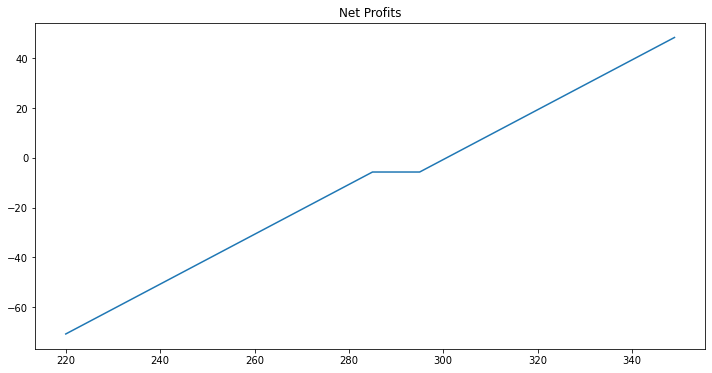

In [543]:
plt.figure(figsize=(12,6))
plt.plot(port_1c['Profits'])
plt.title("Net Profits")
plt.show()

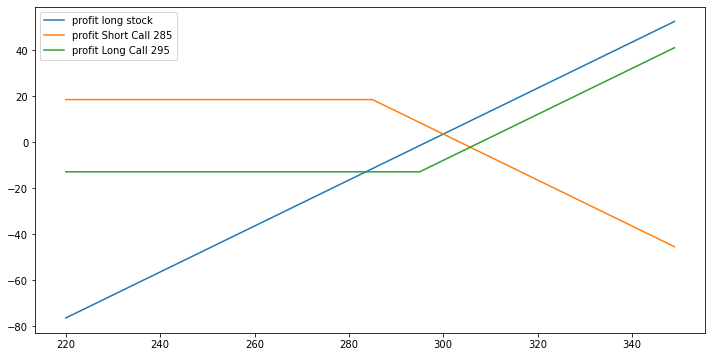

In [544]:
plt.figure(figsize=(12,6))
plt.plot(port_1c['profit long stock'])
plt.plot(port_1c['profit Short Call 285']) 
plt.plot(port_1c['profit Long Call 295'])
plt.legend(['profit long stock','profit Short Call 285','profit Long Call 295'])
plt.show()

In [545]:
data_call

,Calls,Strike,Bid,Ask,Preminum
6,FB 9/18/20 C285,285,18.449997,18.699997,18.574997
8,FB 9/18/20 C290,290,15.4,15.65,15.525
10,FB 9/18/20 C295,295,12.75,12.95,12.85
12,FB 9/18/20 C300,300,10.4,10.55,10.475


#### 1C Equivalent positions

In [546]:
short_put285 = payoff_shortput(285, spots,7.1)
long_call290 = payoff_longcall(290,spots,15.525)
eq_1c = {}
eq_1c.update(short_put285)
eq_1c.update(long_call290)


In [547]:
port_1c_eq = pd.DataFrame(data= eq_1c, index= spots)
port_1c_eq["profits"]= port_1c_eq['profit Short Put 285']+port_1c_eq['profit Long Call 290']

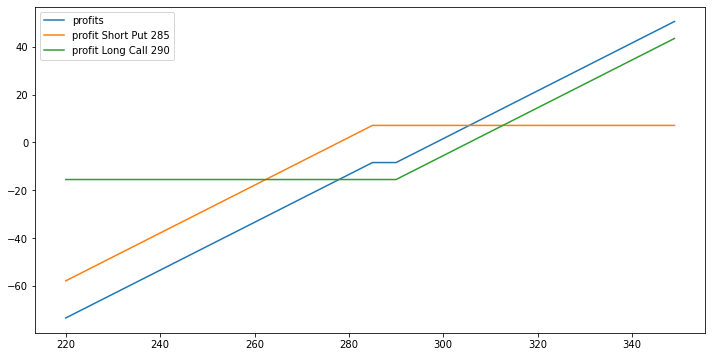

In [548]:
plt.figure(figsize=(12,6))
plt.plot(port_1c_eq["profits"])
plt.plot(port_1c_eq['profit Short Put 285'])
plt.plot(port_1c_eq['profit Long Call 290'])
plt.legend(["profits",'profit Short Put 285','profit Long Call 290'])
plt.show()

#### Question 1 d

In [549]:
data_call

,Calls,Strike,Bid,Ask,Preminum
6,FB 9/18/20 C285,285,18.449997,18.699997,18.574997
8,FB 9/18/20 C290,290,15.4,15.65,15.525
10,FB 9/18/20 C295,295,12.75,12.95,12.85
12,FB 9/18/20 C300,300,10.4,10.55,10.475


In [550]:
data_puts

,Puts,Strike,Bid,Ask,premium
6,FB 9/18/20 P285,285,7,7.2,7.1
8,FB 9/18/20 P290,290,8.95,9.15,9.05
10,FB 9/18/20 P295,295,11.2,11.45,11.325
12,FB 9/18/20 P300,300,13.85,14.1,13.975


We take the put call parity to consider situations for arbitrage, We see that since the pt call parity is not followed the given strike prices there are arbitrage opportunities at all the above strike prices.

In [551]:
arb = data_puts['premium'] +s0 - data_call['Preminum'] - (data_call['Strike']/FV_mult)
arb


6     0.022279
8     0.023456
10   -0.025364
12    0.000817
dtype: object

Strategy 1 for Arbitrage.


Lets consider case 2:
Sell  a put at 290, sell the stock at current price of s0= 296.43, buy a call options at strike price 290 and buy back the stock at the spot.

In [552]:
p1=payoff_longput(290, spots, 9.05)
p2=payoff_shortcall(290, spots, 15.525)
p3=long_stock(spots, 296.43)


In [553]:
dict={}
dict.update(p1)
dict.update(p2)
dict.update(p3)

In [557]:
port_1d= pd.DataFrame(data=dict, index= spots)
port_1d['Profit']=port_1d['profit Long Put 290'] + port_1d['profit Short Call 290'] + port_1d['profit long stock']

In [558]:
port_1d['Profit']

220    0.046529
221    0.046529
222    0.046529
223    0.046529
224    0.046529
         ...   
345    0.046529
346    0.046529
347    0.046529
348    0.046529
349    0.046529
Name: Profit, Length: 130, dtype: float64

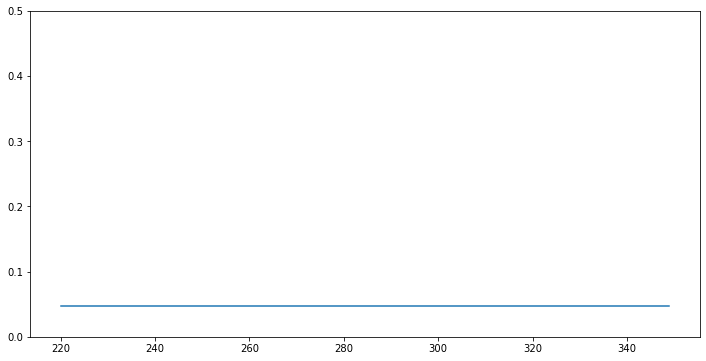

In [559]:
plt.figure(figsize=(12,6))
plt.plot(port_1d['Profit'])
plt.ylim(0,0.5)
plt.show()


We can create arbitrage by entering into similar positions on the other strike prices, this is because the put call parity is not followed. 

We can use this Arbitrage and get into multiple positions in this way and gain no risk free lunch.

#### Question 1 E

in the above question we did not consider the bid ask spread, in (e), considering the bid ask spread. for the same position.

In [560]:
data_call[data_call["Strike"] == 290]["Bid"]


8    15.4
Name: Bid, dtype: object

In [561]:
data_puts[data_puts["Strike"]==290]['Ask']

8    9.15
Name: Ask, dtype: object

In [562]:
p1e=payoff_longput(290, spots, 9.15)
p2e=payoff_shortcall(290, spots, 15.4)
p3e=long_stock(spots, 296.43)
dict2= {}
dict2.update(p1e)
dict2.update(p2e)
dict2.update(p3e)


In [565]:
port_1e= pd.DataFrame(data=dict2, index= spots)
port_1e['Profit']=port_1e['profit Long Put 290'] + port_1e['profit Short Call 290'] + port_1e['profit long stock']

In [567]:
port_1e['Profit']

220   -0.178524
221   -0.178524
222   -0.178524
223   -0.178524
224   -0.178524
         ...   
345   -0.178524
346   -0.178524
347   -0.178524
348   -0.178524
349   -0.178524
Name: Profit, Length: 130, dtype: float64

As seen above there a negative constant profit and we end ujp losing money, There is no arbitrage if we consider the Bid Ask spread for the same position

(-1.0, 0.0)

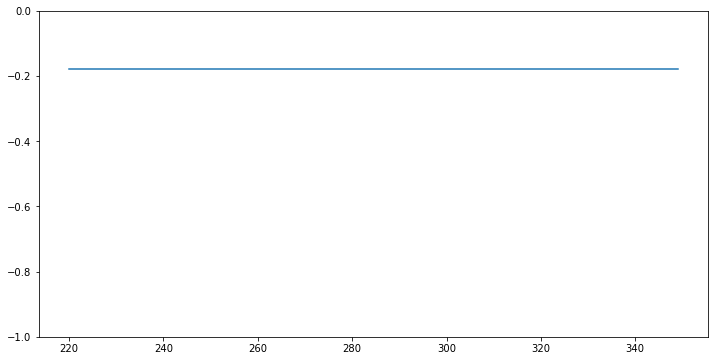

In [568]:
plt.figure(figsize=(12,6))
plt.plot(port_1e['Profit'])
plt.ylim(-1,0)
plt.show()

#### Question 2 

In [569]:
s0 = 3478.73
s1 = np.arange(1000,3950,50)
LUP= 1000*2*(s1-s0)/s0
IPF= s1/s0
dict={"Spot": s1, "Initial": s0, "LUP": LUP, "IPF": IPF}
data_frame= pd.DataFrame(data= dict)

In [570]:
conditions = [
    (data_frame['Spot'] >= 1.07625*s0),
    (data_frame['Spot'] >s0) & (data_frame['Spot'] < 1.07625*s0),
    (data_frame['Spot'] <= s0) & (data_frame['Spot'] >= 0.9*s0),
    (data_frame['Spot'] < s0 ) & (data_frame['Spot'] < 0.9*s0)
    ]

Values = [1152.50, 1000+ data_frame['LUP'], 1000, 1000*data_frame['IPF']+100]

In [571]:
data_frame['Payoff'] = np.select(conditions, Values)
data_frame

,Spot,Initial,LUP,IPF,Payoff
0,1000,3478.73,-1425.077543,0.287461,387.461229
1,1050,3478.73,-1396.331420,0.301834,401.834290
2,1100,3478.73,-1367.585297,0.316207,416.207352
3,1150,3478.73,-1338.839174,0.330580,430.580413
4,1200,3478.73,-1310.093051,0.344953,444.953474
5,1250,3478.73,-1281.346928,0.359327,459.326536
6,1300,3478.73,-1252.600805,0.373700,473.699597
7,1350,3478.73,-1223.854683,0.388073,488.072659
8,1400,3478.73,-1195.108560,0.402446,502.445720
9,1450,3478.73,-1166.362437,0.416819,516.818782


#### Question 1 a

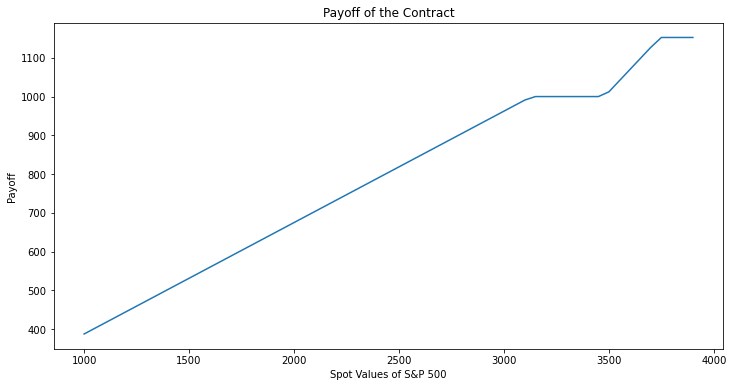

In [572]:
plt.figure(figsize=(12,6))
plt.plot(data_frame['Spot'],data_frame['Payoff'])
plt.title("Payoff of the Contract")
plt.xlabel("Spot Values of S&P 500")
plt.ylabel("Payoff")
plt.show()

#### Question 2 B 

In [581]:
run_x = 1500-1000
data_frame[data_frame['Spot']==1500]['Payoff'] 
data_frame[data_frame['Spot']==1000]['Payoff']
run_y = (531.191843-387.461229)

In [582]:
slope1= run_y/run_x
slope1

0.2874612279999999

In [583]:
run_x2 = (3600-3400)
run_x2
data_frame[data_frame['Spot']==3600]['Payoff'] 
data_frame[data_frame['Spot']==3400]['Payoff']
run_y2=(1069.720846-1000)
slope2=run_y2/run_x2
slope2


0.3486042299999997

To create the payoff like above The slope is not interger value so we might get unrealsitic positions.
1. we can short a Zero Coupon Bond at PV of 100, since we get a minimum of 100 no matter what.
2. Buy (0.2874612279999999) amount of stock/ underlying S&P 500 here.
3. sell (0.2874612279999999) call at 3000.
4. Buy (0.3486042299999997) call at 3500.
5. short (0.3486042299999997) call at 3750.

In [584]:
p1_2b=payoff_shortcall(3000, s1, 0)
p2_2b=payoff_longcall(3400, s1, 0)
p3_2b=payoff_shortcall(3750,s1,0)
p4_2b = {"Long Stock": s1}
dict_2b={}

In [585]:
del p1_2b['profit Short Call 3000']
del p2_2b['profit Long Call 3400']
del p3_2b['profit Short Call 3750']


In [586]:
dict_2b.update(p1_2b)
dict_2b.update(p2_2b)
dict_2b.update(p3_2b)
dict_2b.update(p4_2b)
df=pd.DataFrame(data=dict_2b, index=s1)
df['Payoff_ZCB']=np.repeat(100,len(s1))


In [587]:
df['Net Pay off'] = 0.2874612279999999*df['payoff Short Call 3000'] + 0.3486042299999997*df["payoff Long Call 3400"]+ 0.3486042299999997*df["payoff Short Call 3750"] +	0.2874612279999999*df["Long Stock"]+df["Payoff_ZCB"]
df

,payoff Short Call 3000,payoff Long Call 3400,payoff Short Call 3750,Long Stock,Payoff_ZCB,Net Pay off
1000,0.0,0.0,0.0,1000,100,387.461228
1050,0.0,0.0,0.0,1050,100,401.834289
1100,0.0,0.0,0.0,1100,100,416.207351
1150,0.0,0.0,0.0,1150,100,430.580412
1200,0.0,0.0,0.0,1200,100,444.953474
1250,0.0,0.0,0.0,1250,100,459.326535
1300,0.0,0.0,0.0,1300,100,473.699596
1350,0.0,0.0,0.0,1350,100,488.072658
1400,0.0,0.0,0.0,1400,100,502.445719
1450,0.0,0.0,0.0,1450,100,516.818781


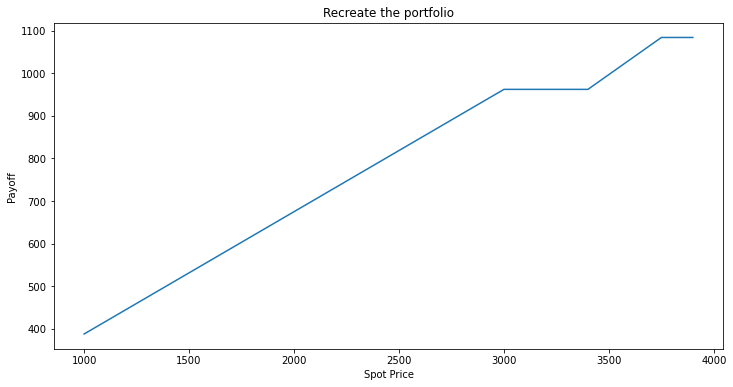

In [588]:
plt.figure(figsize=(12,6))
plt.plot(df['Net Pay off'])
plt.title("Recreate the portfolio")
plt.xlabel("Spot Price")
plt.ylabel("Payoff")
plt.show()

### Question 2 C :

The position we created should have a price equal to the position created in question 2b, by following the no arbitrage principan, if two portfolio have same payoff they must have the same price.


Thus the net  
    Price = -(Zero Coupon Bond at PV of 100) + (Buy the stock price, 0.2874612279999999 stock.) - (sell 0.2874612279999999 call at 3000 premium) + (Buy 0.3486042299999997 call at 3500 premium) - (short 0.3486042299999997* call at 3750 premium)"